# Analysis
* In general, the number of drivers increase with the city type. Rural areas have less percentage of drivers 2.6% and rides 5.3% vs 80.9% and 68.4% correspondingly in urban areas. 
* Urban areas also have the highest percentage of total fares at 62.7% vs 6.8% in rural areas and 30.5% in suburban areas.
* Although urban areas have the highest persentage of both, drivers and rides, they have the lowest average fare. The highest average fare among the three type of cities is in rural areas.   



In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.head()
#city_data.head()
merged = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
#merged.head()

In [2]:
grouped_by_type = merged.groupby(['type'])
#grouped_by_type.head()

In [3]:
grouped = merged.groupby(['type', 'city'])

In [4]:
average_fare = grouped['fare'].mean()
average_fare_df = pd.DataFrame(average_fare)
#average_fare_df.head()

In [5]:
total_rides = grouped['ride_id'].count()
total_rides_df = pd.DataFrame(total_rides)
#total_rides_df.head()

In [6]:
total_drivers = grouped['driver_count'].mean() 
#total_drivers = grouped['driver_count'].sum() 
total_drivers_df = pd.DataFrame(total_drivers)
#total_drivers_df

In [7]:
sub_total = pd.merge(total_rides_df, average_fare_df, how='inner', on=['type', 'city'])
#sub_total.head()

In [8]:
total = pd.merge(sub_total, total_drivers_df, how='inner', on=['type', 'city'])
total.reset_index(level=0, inplace=True)
mapping = {'Rural': 'gold', 'Urban': 'lightcoral', 'Suburban': 'lightskyblue'}

#def mapcolor(x):
#    return mapping[x]
#total['color'] = total['type'].apply(mapcolor)

total['color'] = total['type'].apply(lambda x: mapping[x])
total.head()
#total.count()

,type,ride_id,fare,driver_count,color
city,,,,,
Bradshawfurt,Rural,10,40.064000,7,gold
Garzaport,Rural,3,24.123333,7,gold
Harringtonfort,Rural,6,33.470000,4,gold
Jessicaport,Rural,6,36.013333,1,gold
Lake Jamie,Rural,6,34.358333,4,gold


# Bubble Plot of Ride Sharing Data

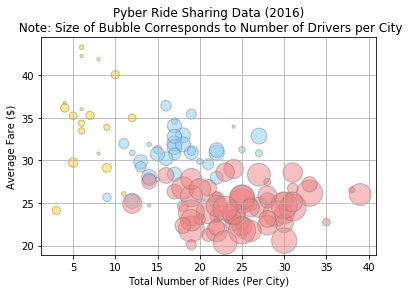

In [9]:
x = total['ride_id']
y = total['fare']
z = total['driver_count']
#labels = ['Rural', 'Urban', 'Suburban']
#colors =['gold', 'light coral','light sky blue']
plt.scatter(x, y, s=z*10, c=total['color'], alpha=0.5, edgecolors="grey", linewidth=1)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title('Pyber Ride Sharing Data (2016)'
          '\n Note: Size of Bubble Corresponds to Number of Drivers per City')
plt.grid()

#c=x, cmap="Blues"
plt.savefig("average_fare.png")
plt.show()


# Total Fares by City Type

In [10]:
total_fare = merged['fare'].sum()
#total_fare

In [11]:
total_fare_grouped = grouped_by_type['fare'].sum()
#total_fare_grouped

In [12]:
percent_fare = (total_fare_grouped / total_fare) * 100
percent_fare_df = pd.DataFrame(percent_fare)
#percent_fare_df

In [13]:
type_list = percent_fare_df.keys()
explode = (0, 0, 0.1,)
colors = ['gold', 'lightskyblue', 'lightcoral']

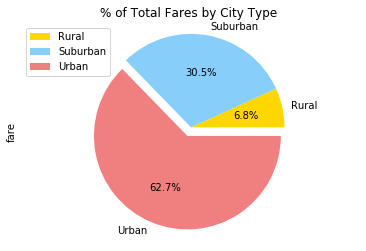

In [14]:
fare_plot = percent_fare_df.plot(kind='pie', explode=explode, colors=colors, y=type_list, autopct='%1.1f%%',
                                 title=("% of Total Fares by City Type"))
plt.axis("equal")
plt.savefig("fares_by_type.png")

# Total Rides by City Type

In [15]:
rides = merged['ride_id'].count()
#rides

In [16]:
rides_by_type = grouped_by_type['ride_id'].count()
#rides_by_type

In [17]:
percent_rides = (rides_by_type / rides) * 100
percent_rides_df = pd.DataFrame(percent_rides)
#percent_rides_df

In [18]:
type_list_r = percent_rides_df.keys()
explode = (0, 0, 0.1,)
colors = ['gold', 'lightskyblue', 'lightcoral']

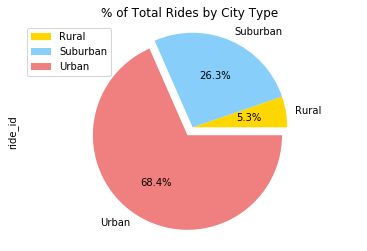

In [19]:
rides_plot = percent_rides_df.plot(kind='pie', explode=explode, colors=colors, y=type_list_r, autopct='%1.1f%%', 
                                   title=("% of Total Rides by City Type"))
plt.axis("equal")
plt.savefig("rides_by_type.png")

# Total Drivers by City Type

In [20]:
drivers = city_data['driver_count'].sum()
#drivers

In [21]:
city_data_by_type = city_data.groupby(['type'])
drivers_by_type = city_data_by_type['driver_count'].sum()
#drivers_by_type

In [22]:
percent_drivers = (drivers_by_type / drivers) * 100
percent_drivers_df = pd.DataFrame(percent_drivers)
#percent_drivers_df

In [23]:
type_list_d = percent_drivers_df.keys()
explode = (0, 0, 0.1,)
colors = ['gold', 'lightskyblue', 'lightcoral']

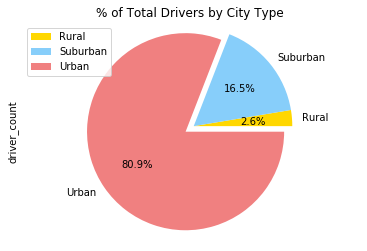

In [24]:
drivers_plot = percent_drivers_df.plot(kind='pie', explode=explode, colors=colors, y=type_list_d, autopct='%1.1f%%', 
                                       title=("% of Total Drivers by City Type"))
plt.axis("equal")
plt.savefig("drivers_by_type.png")